
# Sheetlet Packer Example Workflow

This notebook demonstrates the complete workflow for packing cells in a sheetlet, processing them through MATLAB, and generating visualizations.

We'll use seed 10 and index 0 as an example.



## 1. Import Required Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sheetlet_packer import SheetletPacker
import os
import scipy.io as sio
from shapely.geometry import Polygon
from matplotlib.patches import Polygon as MplPolygon
from matplotlib.collections import PatchCollection
from calling_matlab import call_matlab_script


## 2. Run Sheetlet Packer

Initialize and run the packer for seed 10 and index 0.


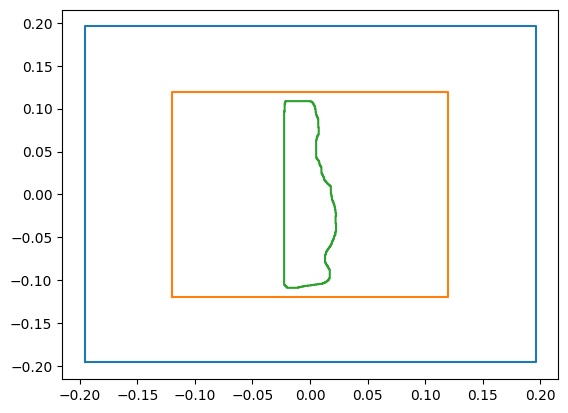

Initial Phase: Step 0
Initial Phase: Step 5
Initial Phase: Step 10
Initial Phase: Step 15
Initial Phase: Step 20
Initial Phase: Step 25
Initial Phase: Step 30
Initial Phase: Step 35
Initial Phase: Step 40
Initial Phase: Step 45
ICS 0.5942206397657112, step 0
ICS 0.6910909684668919, step 100
ICS 0.6658914207309983, step 200
ICS 0.6851910320832579, step 300
ICS 0.697332639932926, step 400
ICS 0.6703101919338889, step 500
ICS 0.6922683932876197, step 600
ICS 0.6911415652336653, step 700
ICS 0.6956006400450474, step 800
ICS 0.7060350697723856, step 900


In [2]:

# Set parameters
seed = 10
index = 0
input_file = f'sheetlet_{index}.npy'
output_prefix = "output"

# Create packer instance
random_state = np.random.RandomState(seed)
packer = SheetletPacker(input_file, index,celltype="real", random_state=random_state)

# Run packing process
packer.pack(output_prefix, seed=seed, isPlot=True)

#If it does not converge >2000 iterations change seed (changes the initial conditions for the cells) or increase a bit the attraction parameter (curr=0.9*rep)

In the image directory you can see the packing density vs the number of iterations and different stages of the sheetlet packer 

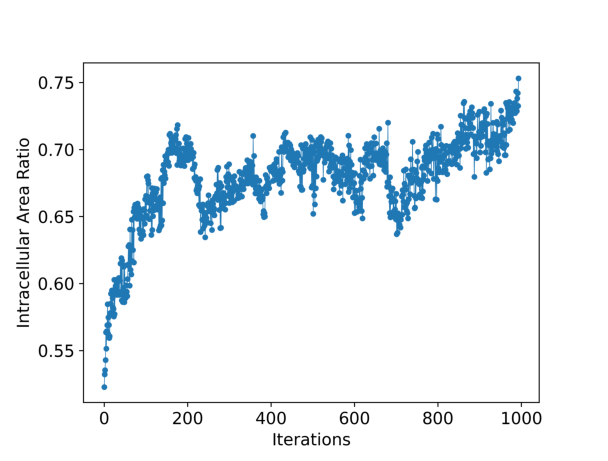

In [3]:
image = plt.imread("images/cellgrid_output_sheetlet_index_0_seed_10_ics.png")
plt.imshow(image, interpolation='antialiased')
plt.axis('off')
plt.tight_layout()
plt.show()


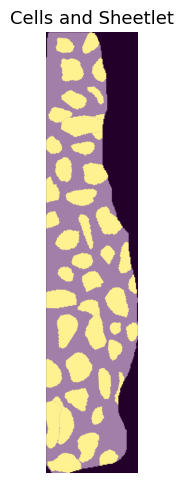

In [4]:
cells = plt.imread("images/cellgrid_output_sheetlet_index_0_seed_10_cells.png")
sheetlet = plt.imread("images/cellgrid_output_sheetlet_index_0_seed_10_sheetlet.png")
plt.imshow(cells, interpolation='antialiased')
plt.imshow(sheetlet, interpolation='antialiased',alpha=0.5,cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.title("Cells and Sheetlet")
plt.show()


## 3. Process with MATLAB

Run the MATLAB processing script to thicken cells and remove overlaps.


In [5]:

# Set MATLAB script parameters
matlab_script = os.path.abspath('matlab_scripts/grow_cells_uniform.m')
cells_file = f'../matlab_inputs/{output_prefix}_sheetlet_index_{index}_seed_{seed}_cells.mat'
sheetlet_file = f'../matlab_inputs/{output_prefix}_sheetlet_index_{index}_seed_{seed}_sheetlet.mat'
resolution = 0.06/1000  # mm per pixel
targetECV = 0.125  # Target extracellular volume
output_file = f'output_sheetlet_index_{index}_seed_{seed}'

# Call MATLAB script using the function from calling_matlab.py
call_matlab_script(matlab_script, cells_file, sheetlet_file, resolution, resolution, targetECV, output_file)


Executing MATLAB command: cd('/Users/ia4118/Desktop/PHDLITERATUREREVIEW/sheetlet_packer/matlab_scripts'); grow_cells_uniform('../matlab_inputs/output_sheetlet_index_0_seed_10_cells.mat', '../matlab_inputs/output_sheetlet_index_0_seed_10_sheetlet.mat', 5.9999999999999995e-05, 5.9999999999999995e-05, 0.125, 'output_sheetlet_index_0_seed_10'); quit;


2025-05-06 14:27:21.482 MATLAB[85437:1716461] CoreText note: Client requested name ".SFNS-Regular", it will get TimesNewRomanPSMT rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2025-05-06 14:27:21.482 MATLAB[85437:1716461] CoreText note: Set a breakpoint on CTFontLogSystemFontNameRequest to debug.
2025-05-06 14:27:21.487 MATLAB[85437:1716461] CoreText note: Client requested name ".SFNS-Bold", it will get TimesNewRomanPSMT rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2025-05-06 14:27:21.498 MATLAB[85437:1716461] CoreText note: Client requested name ".SFNS-Regular", it will get TimesNewRomanPSMT rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2025-05-06 14:

MATLAB script executed successfully. Output:

                            < M A T L A B (R) >
                  Copyright 1984-2023 The MathWorks, Inc.
                  R2023a (9.14.0.2206163) 64-bit (maci64)
                             February 22, 2023

 
To get started, type doc.
For product information, visit www.mathworks.com.
 
inconsistencies that may produce inaccurate or unexpected results. Input data
has been modified to create a well-defined polyshape. 
> In polyshape/checkAndSimplify (line 523)
In polyshape (line 175)
In grow_cells_uniform (line 87) 

total_area =

   4.6485e-05

inconsistencies that may produce inaccurate or unexpected results. Input data
has been modified to create a well-defined polyshape. 
> In polyshape/checkAndSimplify (line 523)
In polyshape (line 175)
In grow_cells_uniform (line 87) 

total_area =

   1.0034e-04

inconsistencies that may produce inaccurate or unexpected results. Input data
has been modified to create a well-defined polyshape. 
> I

The matlab script has created two files in the matlab_output folder containing the cells before and after thickening. 

In [2]:
from meshing.utils import return_vertices

#These are the centroids for each sheetlet. These are obtained from the ROI selected by Jan
centroids = [
    [0.022600500000000003, 0.2829195],
    [0.24740850000000003, 0.0375915], 
    [0.2508285, 0.0927675],
    [0.1904085, 0.15341549999999998], 
    [0.07093650000000001, 0.28497150000000004],
    [0.1128885, 0.2409675],
    [0.1445805, 0.3084555],
    [0.20454450000000002, 0.3038955], 
    [0.29414850000000003, 0.2918115], 
    [0.37235250000000003, 0.1340355], 
    [0.3728085, 0.28451550000000003], 
    [0.44326050000000006, 0.2788155]]

filename_after_thicken = f"matlab_outputs/after_thicken_output_sheetlet_index_0_seed_10.mat"
data = sio.loadmat(filename_after_thicken)
polygons = data['polygons']
polygons_shapely = return_vertices(polygons,centroids[0])

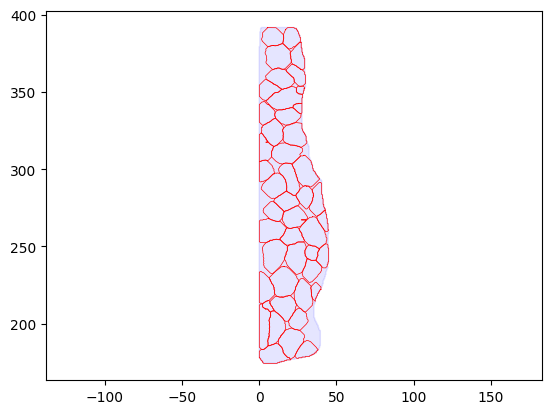

In [3]:
import shapely

filename_sheetlet = "sheetlet_" + str(0) + ".npy"
data = np.load(filename_sheetlet, allow_pickle=True)
cells, sheetlet_boundary, centroid = data[0], data[1], data[2]


#we have to scale by 1000 the boundary/centroid as it is in mm and cells are in um
sheetlet_boundary = shapely.affinity.scale(sheetlet_boundary, xfact=1000, yfact=1000, origin=(0,0))
sheetlet_poly = shapely.affinity.translate(sheetlet_boundary, xoff=+centroid[0]*1000, yoff=+centroid[1]*1000)

plt.fill(*sheetlet_poly.exterior.xy, color='blue',alpha=0.1)
for poly in polygons_shapely:
    plt.plot(poly.exterior.xy[0], poly.exterior.xy[1], color='red',linewidth=0.5)
plt.axis('equal')
plt.show()

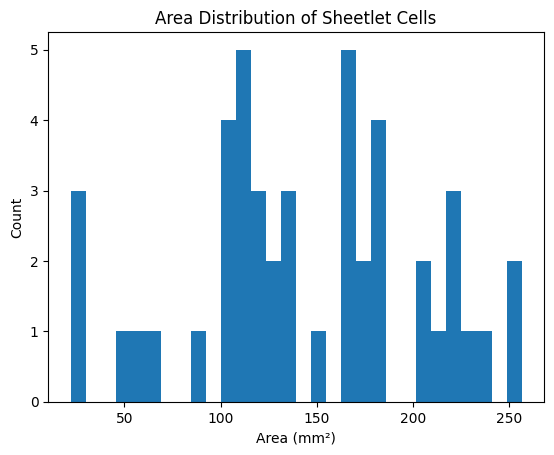

In [4]:
areas = [poly.area for poly in polygons_shapely]
plt.hist(areas, bins=30)
plt.xlabel('Area (mm²)')
plt.ylabel('Count')
plt.title('Area Distribution of Sheetlet Cells')
plt.show()


## 4. Mesh with GMSH


In [5]:
from meshing.create_mesh import mesh_sheetlet
folder_name = "sheetlet_0_mesh"    
mesh_sheetlet(polygons_shapely, folder_name,extrusion_layers=20)

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Info    : Increasing process stack size (8176 kB < 16 MB)



Warning: PLY doesn't support 64-bit integers. Casting down to 32-bit.

Mesh created


[<POLYGON ((5.921 185.629, 6.761 185.629, 7.841 185.989, 8.261 186.289, 8.921...>,
 <POLYGON ((6.401 191.689, 6.641 192.169, 6.461 193.609, 6.761 194.21, 6.701 ...>,
 <POLYGON ((4.181 209.449, 5.561 209.33, 6.401 208.189, 6.881 207.71, 7.421 2...>,
 <POLYGON ((7.001 213.229, 7.841 211.489, 8.561 210.77, 8.741 210.109, 9.461 ...>,
 <POLYGON ((7.181 228.229, 7.181 227.929, 7.901 226.729, 8.021 226.129, 9.221...>,
 <POLYGON ((6.461 253.189, 7.361 253.909, 8.141 253.849, 8.801 253.969, 9.281...>,
 <POLYGON ((6.161 267.89, 6.641 267.83, 7.961 267.109, 8.801 266.929, 9.581 2...>,
 <POLYGON ((9.821 278.449, 10.901 277.669, 13.481 275.03, 14.621 274.129, 16....>,
 <POLYGON ((9.821 296.929, 10.361 297.41, 11.381 297.29, 11.561 297.47, 12.22...>,
 <POLYGON ((5.381 305.33, 8.561 302.15, 8.561 301.609, 8.981 301.189, 8.981 3...>,
 <POLYGON ((4.601 319.069, 5.681 317.749, 5.621 317.569, 4.601 317.569, 4.361...>,
 <POLYGON ((1.901 326.869, 1.901 327.35, 2.381 327.949, 3.461 328.73, 4.901 3...>,
 <PO